In [1]:
#logoistic regression 
#for binary classification 
#predicted value in caterogical but --- linearRegression predicted values comtinuous 
#linearRegression: y=m*x+b 
#logisticregression: y=
#sigmoid(z)=1/1+e^-(z) 
#e:eulersnumber~2.71828 
#y=1/1+e^(-m*x+b)   


In [77]:
import pandas as pd 
df=pd.read_csv("C:\\Users\\Document\\OneDrive\\Documents\\csv files\\insurance_data.csv") 
df 

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


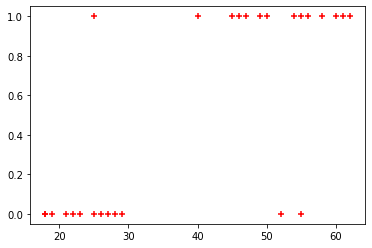

In [78]:
from matplotlib import pyplot as plt 
plt.scatter(df.age,df.bought_insurance,marker="+",color='red')

In [82]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test=train_test_split(df[['age']],df.bought_insurance,test_size=.3)

In [87]:
x_train

,age
7,60
8,62
18,19
25,54
6,55
11,28
15,55
14,49
19,18
17,58


In [88]:
x_test

,age
26,23
21,26
10,18
24,50
22,40
3,52
5,56
20,21
0,22


In [89]:
y_train

7     1
8     1
18    0
25    1
6     0
11    0
15    1
14    1
19    0
17    1
4     1
23    1
2     1
9     1
16    1
12    0
1     0
13    0
Name: bought_insurance, dtype: int64

In [90]:
y_test

26    0
21    0
10    0
24    1
22    1
3     0
5     1
20    0
0     0
Name: bought_insurance, dtype: int64

In [91]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train) 

LogisticRegression()

In [92]:
model.predict(x_test) 

array([0, 0, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [93]:
model.score(x_test,y_test) 

0.8888888888888888

In [94]:
model.predict_proba(x_test) 

array([[0.85796449, 0.14203551],
       [0.80236395, 0.19763605],
       [0.92134306, 0.07865694],
       [0.14459116, 0.85540884],
       [0.38860792, 0.61139208],
       [0.11480532, 0.88519468],
       [0.07093792, 0.92906208],
       [0.88729323, 0.11270677],
       [0.87335297, 0.12664703]])

In [95]:
model.coef_

array([[0.13245019]])

In [96]:
model.intercept_

array([-4.84483995])

In [97]:
import math 
def sigmoid(x):
    return 1/(1 + math.exp(-x)) 

In [98]:
def prediction_func(age):
    z=.042*age-1.53 
    y=sigmoid(z) 
    return(y) 

In [99]:
age=35
prediction_func(age) 

0.4850044983805899

In [101]:
age=43
prediction_func(age)  

0.568565299077705

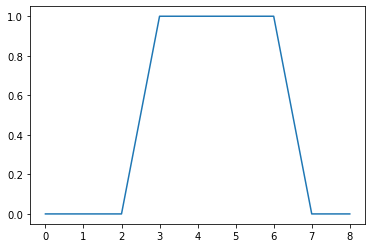

In [106]:

plt.plot(model.predict(x_test)) 

In [107]:
#exercise 

In [109]:
hr=pd.read_csv("C:\\Users\\Document\\OneDrive\\Documents\\csv files\\HR_comma_sep.csv") 
hr 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [110]:
#data exploration and visualization 

In [115]:
left = hr[hr.left==1] 
left.shape 

(3571, 10)

In [117]:
retained=hr[hr.left==0]  
retained.shape 

(11428, 10)

In [118]:
#average number for all column 


In [120]:
hr.groupby('left').mean() 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [121]:
#impact of salary on employee retention 

<AxesSubplot:xlabel='salary'>

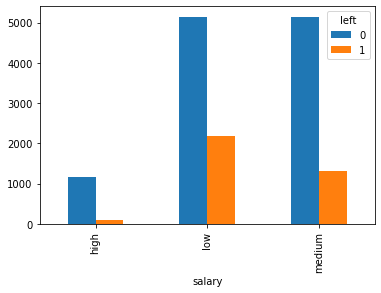

In [124]:
pd.crosstab(hr.salary,hr.left).plot(kind='bar') 

<AxesSubplot:xlabel='Department'>

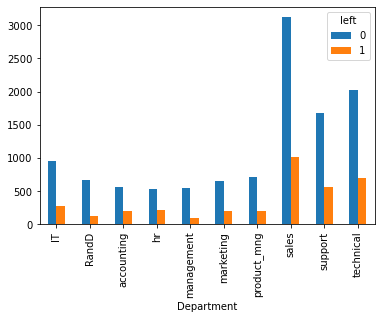

In [126]:
pd.crosstab(hr.Department,hr.left).plot(kind='bar') 

In [131]:
subdf=hr[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']] 
subdf.head() 

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [135]:
salary_dummies=pd.get_dummies(subdf.salary,prefix='salary') 
salary_dummies.head() 

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [138]:
hr_with_dummies=pd.concat([subdf,salary_dummies],axis=1) 
hr_with_dummies

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [147]:
#hr_with_dummies.drop('salary',axis=1,inplace=True) 

hr_with_dummies   

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [150]:
x=hr_with_dummies
x 

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [152]:
y=hr.left
y 

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [154]:
from sklearn.model_selection import train_test_split



In [157]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.3) 

In [160]:
x_train  

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
11634,0.77,201,0,1,0,0
9554,0.62,134,0,0,0,1
447,0.10,298,0,0,1,0
12484,0.38,145,0,0,1,0
569,0.25,214,0,0,0,1
...,...,...,...,...,...,...
10446,0.93,134,0,0,1,0
2389,0.93,160,0,0,1,0
5511,0.71,209,0,0,0,1
10793,0.61,176,0,0,0,1


In [167]:
x_test 

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
4384,0.48,197,0,0,0,1
10696,0.82,229,0,0,0,1
3803,0.69,233,0,0,0,1
8025,0.68,179,0,0,0,1
3719,0.57,189,0,0,0,1
...,...,...,...,...,...,...
8551,0.88,240,0,0,1,0
9240,0.19,188,0,0,0,1
10977,0.16,171,0,0,0,1
5895,0.53,236,0,0,0,1


In [164]:
from sklearn.linear_model import LogisticRegression 
mod= LogisticRegression() 
mod.fit(x_train,y_train)  

LogisticRegression()

In [166]:
mod.predict(x_test) 

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [169]:
mod.score(x_test,y_test) 

0.7722222222222223

In [171]:
mod.predict_proba(x_test) 

array([[0.73672652, 0.26327348],
       [0.90634336, 0.09365664],
       [0.853356  , 0.146644  ],
       ...,
       [0.46321019, 0.53678981],
       [0.757539  , 0.242461  ],
       [0.23423327, 0.76576673]])